Import necessary python packages

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

Import Boston data set and store it in a variable called boston.

In [2]:
import sklearn
from sklearn.datasets import load_boston
boston_data = load_boston()

Boston is a dictionary, understanding the keys of this dictionary.

In [3]:
boston_data.keys()

dict_keys(['feature_names', 'data', 'target', 'DESCR'])

In [4]:
boston_data.data.shape

(506, 13)

Print the feature names of boston data set.

In [5]:
print(boston_data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


This dataset have 506 instances(rows) and 13 attributes or parameters(columns). 
We will predict the housing prices in boston region using the features given.
Understand the characteristics of Boston Data set Features

In [6]:
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Convert Boston dataset into a pandas data frame

In [7]:
bos_df = pd.DataFrame(boston_data.data)
bos_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The column names are just numbers, so replace those numbers with the feature names

In [8]:
bos_df.columns = boston_data.feature_names
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


boston.target contains the housing prices

In [9]:
bos_df['PRICE'] = boston_data.target

In [10]:
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Fit the linear regression model and predict the Boston housing prices.
Use least squares method to estimate the coefficients. 

Y = boston housing price (also called “target” data in Python) and

X = all the other features (or independent variables)

Import linear regression from sci-kit learn module. Then drop the price column as the model requires only the parameters as my X values.  Store linear regression object in a variable called lm.

In [11]:
from sklearn.linear_model import LinearRegression

X = bos_df.drop('PRICE', axis = 1 )
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Important functions while fitting a linear regression model are:

lm.fit() -> fits a linear model

lm.predict() -> Predict Y using the linear model with estimated coefficients

lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model. 

.coef_  gives the coefficients and 

.intercept_  gives the estimated intercepts.

In [13]:
lm.fit(X, bos_df.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Print the intercept and number of co-efficients.

In [14]:
print("Estimated intercept co-efficient :", lm.intercept_)

Estimated intercept co-efficient : 36.49110328036135


In [15]:
 print("No of Co-efficients :", len(lm.coef_))

No of Co-efficients : 13


Construct a data frame that contains features and estimated coefficients.

In [16]:
pd.DataFrame(list(zip(X.columns, lm.coef_)),)

,0,1
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


From the data frame that there is a high correlation between RM and prices. Lets plot a scatter plot between True housing prices and True RM.

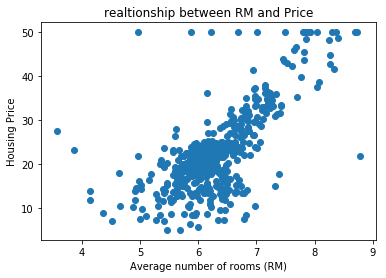

In [17]:
plt.scatter(bos_df.RM, bos_df.PRICE)
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("Housing Price")
plt.title("realtionship between RM and Price")
plt.show()

Calculate the predicted prices (Y^i) using lm.predict. Then display the first 5 housing prices. These are 

In [18]:
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

Plot a scatter plot to compare true prices and the predicted prices.

Text(0.5,1,'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

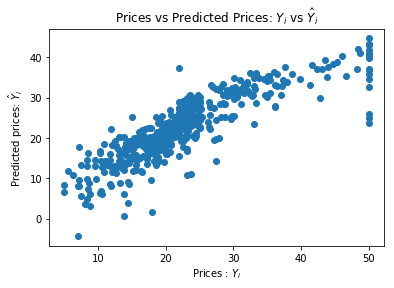

In [19]:
plt.scatter(bos_df.PRICE, lm.predict(X))
plt.xlabel("Prices : $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

Notice that there is some error in the prediction as the housing prices increase.

In [20]:
mseFull = np.mean((bos_df.PRICE - lm.predict(X)) ** 2)
print(mseFull)

21.897779217687493


Linear regression for  one feature the error will be very high. Lets take the feature ‘PTRATIO’ and calculate the mean squared error.

In [21]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']] , bos_df.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
msePTRATIO = np.mean((bos_df.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print(msePTRATIO)

62.65220001376927


The mean squared error has increased. So this shows that a single feature is not a good predictor of housing prices.

Training and validation data sets. In practice we wont implement linear regression on the entire data set, you will have to split the data sets into training and test data sets. So that you train your model on training data and see how well it performed on test data. 

How to do train-test split

In [23]:
X_train = X[:50]
X_test  = X[-50:]

y_train = bos_df.PRICE[:50]
y_test  = bos_df.PRICE[-50:]

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(50, 13)
(50,)
(50, 13)
(50,)


Create training and test data sets manually, but this is not the right way to do, because we may be training your model on less expensive houses and testing on expensive houses.

Divide the data sets randomly. Scikit learn provides a function called train_test_split to do this.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, bos_df.PRICE, test_size=.25, random_state = 5)

In [25]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(379, 13)
(379,)
(127, 13)
(127,)


In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)


In [28]:
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_train  - lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_test  - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 21.514712732185078
Fit a model X_train, and calculate MSE with X_test, Y_test: 24.29810576843943


Residual plots are a good way to visualize the errors in the data.  If we have done a good job then the data should be randomly scattered around line zero. If we see structure in our data, that means your model is not capturing some thing. Maye be there is a interaction between 2 variables that we are not considering, or may be we are measuring time dependent data. If we get some structure in our data, we should go back to your model and check whether we are doing a good job with our parameters.

Text(0,0.5,'Residuals')

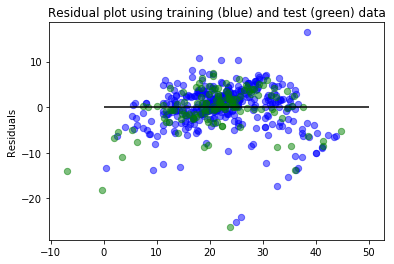

In [29]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c='g', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax =50)
plt.title('Residual plot using training (blue) and test (green) data')
plt.ylabel('Residuals')